<a href="https://colab.research.google.com/github/shivanir23/tweets_root2ai/blob/main/uttarakhand_tweetsanalysis_ShivaniR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Uttarakhand Tweet Analysis**-ShivaniR

## Importing libraries,Downloading dataset

In [ ]:
import pandas as pd
import nltk


url="https://internshala.com/uploads/chat-uploads/60296bfbe5a5f1613327355-260453.zip"

tweets=pd.read_csv(url)
tweets.head(20)


,tweet
0,Horrible news out of #Uttarakhand
1,Prayer for #Uttarakhand 🙏🙏
2,Ohhh God Please Save #Uttarakhand
3,Extremely Sad To Hear About The #Uttarakhand G...
4,Prayers for #Uttarakhand 🙏🙏
5,Prayer for #Uttarakhand.\n🙏🙏
6,ALERT 🚨 #Uttarakhand \n\nEmergency 🆘 numbers 1...
7,Heavy Devastation Due To Glacier breakage in C...
8,I wish everyone stay safe in Uttarakhand duri...
9,O Lord Shiva please save #Uttarakhand !


In [ ]:
tweets.shape

(8146, 1)

# Data Pre Processing

In [ ]:
X=tweets['tweet']


# Cleaning Data

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem import PorterStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop_words=stopwords.words('english')
punct=string.punctuation
stemmer=PorterStemmer()

In [ ]:
import re
cleaned_data=[]
for i in range(len(X)):
  tweet=re.sub('[^a-zA-Z]',' ',X.iloc[i])
  tweet=tweet.lower().split()
  tweet=[stemmer.stem(word) for word in tweet if (word not in stop_words) and (word not in punct)]
  tweet=' '.join(tweet)
  cleaned_data.append(tweet)



## Cleaned data 

In [ ]:
cleaned_data

['horribl news uttarakhand',
 'prayer uttarakhand',
 'ohhh god pleas save uttarakhand',
 'extrem sad hear uttarakhand glacier break pray safeti miss peopl helplin http co hxq hb',
 'prayer uttarakhand',
 'prayer uttarakhand',
 'alert uttarakhand emerg number pleas follow offici advisori uttarakhand chamoli',
 'heavi devast due glacier breakag chamoli uttrakhand sad news geograph issu countri http co hfmkb bx',
 'wish everyon stay safe uttarakhand tragedi uttarakhand',
 'lord shiva pleas save uttarakhand',
 'distress hear glacier break uttarakhand pray everyon safeti',
 'uttarakhand tragic event unfold http co bqio lfswg',
 'pray safeti uttarakhand',
 'happen scari prayer uttarakhand peopl hope everyon stay safe may god prot http co vksbhteeap',
 'pray uttarakhand',
 'pray uttarakhand uttarakhand',
 'sad news pray labor uttarakhand',
 'kktotlani prayer uttarakhand',
 'pray uttarakhand peopl mahadev',
 'prayer live devbhumi uttarakhand',
 'scari news come uttarakhand pray safeti',
 'scar

### **WORDCLOUD**

Most common tweeted **words**

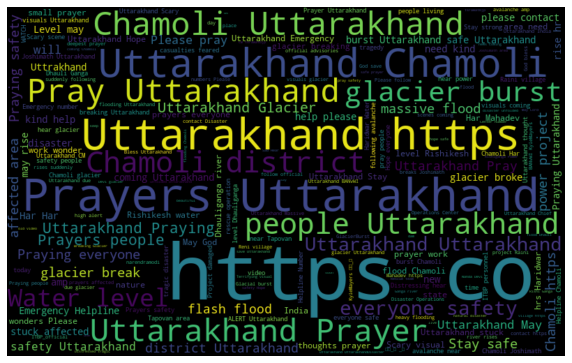

In [ ]:

import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline
all_words = ' '.join([text for text in tweets['tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## This **wordcloud** gives us the **summary of the situation** with help of commonly tweeted key words-


1. Uttarakhand
2. Chamoli
3. Glacier
4. People
5. break
6. Prayer
7. Stay Safe

 



### Most **frequent tweets and words**

In [ ]:

from collections import Counter
#Term Freuency - TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(tweets['tweet'])
#Count Most Frequent Words
Counter = Counter(tweets['tweet'])
most_occur = Counter.most_common(10) 
print(most_occur)


[('Prayers for #Uttarakhand', 95), ('Prayers for #Uttarakhand 🙏', 77), ('Pray for #Uttarakhand', 50), ('Emergency Helpline No.\n1070, 9557444486 For #Chamoli #Uttarakhand', 34), ('Prayers for #Uttarakhand 🙏🏻', 28), ('Distressing to hear about the glacier breaking off in #Uttarakhand Praying everyone’s safety there 🙏', 26), ('ALERT 🚨 #Uttarakhand \n\nEmergency 🆘 numbers 1070  9557444486 \n\nPlease follow all official advisories.\n\n#Uttarakhand', 22), ('Scary scenes coming from #Uttarakhand \n\nPraying for safety of all 🙏🏻', 19), ('Prayers for #Uttarakhand 🙏🙏', 17), ('Prayers for #Uttarakhand 🙏🏼🙏🏼', 15)]


### Most **commonly tweeted helpline number**

In [ ]:
import re
print(most_occur[3])
x=most_occur[3][0]
Phonenumber=re.compile(r'\d\d\d\d\d\d\d\d\d\d')
m=Phonenumber.search(x)
print('mobile number found from the string : ',m)


('Emergency Helpline No.\n1070, 9557444486 For #Chamoli #Uttarakhand', 34)
mobile number found from the string :  <_sre.SRE_Match object; span=(29, 39), match='9557444486'>



## TO find **important data** and **number of people** affected

In [ ]:
for text in X:
 Phonenumber=re.compile(r'\d\d\d\d\d\d\d\d\d\d')
 m=Phonenumber.search(text)
 if (m!=None):
  print('')
 elif (m==None): 
  data=re.compile(r'\b\d+\b')
  s=data.search(text)
  if (s!=None):
     print('data found from the string : ',text.splitlines()[0])




data found from the string :  4 Army columns, Two Medical teams,  one Engineering Task Force deployed at Ringi village. Army helicopters on aeria… https://t.co/Y1tGCRIOeZ

data found from the string :  Water level at Rishikesh the water Level may rise to 340.50 m at 20:00 hrs and Haridwar the Water Level May Reach 2… https://t.co/ov9E79FYCe
data found from the string :  #Uttarakhand: If you are stuck in the affected area, if you need any kind of help, please contact 1070 or 955744448… https://t.co/boOvMPAqHA

data found from the string :  About 100 to 150 people are feared to be killed in the #flashflood in #Uttarakhand #Chamoli district, news agency A… https://t.co/nScJsRSK5F
data found from the string :  If you are stuck in the affected area and need any kind of help, please contact Disaster Operations Center number 1… https://t.co/NxgppCUuvN
data found from the string :  #Uttarakhand

data found from the string :  100-150 casualties report from chamoli district #Uttarakhand
data fo


## **Number of people** affected-
1.   **150 people** feared dead as glacier breaks in Uttarakhand 
2.   #BREAKING: **10 bodies** recovered and **157** still missing after a glacier burst in #Uttarakhand/#India.



### To find all **helpline numbers** in tweets

In [ ]:
for text in X:
 Phonenumber=re.compile(r'\d\d\d\d\d\d\d\d\d\d')
 m=Phonenumber.search(text)
 if (m!=None):
  print('helpline number found from the string : ',m)


helpline number found from the string :  <_sre.SRE_Match object; span=(49, 59), match='9557444486'>
helpline number found from the string :  <_sre.SRE_Match object; span=(49, 59), match='9557444486'>
helpline number found from the string :  <_sre.SRE_Match object; span=(49, 59), match='9557444486'>
helpline number found from the string :  <_sre.SRE_Match object; span=(49, 59), match='9557444486'>
helpline number found from the string :  <_sre.SRE_Match object; span=(49, 59), match='9557444486'>
helpline number found from the string :  <_sre.SRE_Match object; span=(60, 70), match='9557444486'>
helpline number found from the string :  <_sre.SRE_Match object; span=(119, 129), match='9557444486'>
helpline number found from the string :  <_sre.SRE_Match object; span=(57, 67), match='9557444486'>
helpline number found from the string :  <_sre.SRE_Match object; span=(105, 115), match='9557444486'>
helpline number found from the string :  <_sre.SRE_Match object; span=(29, 39), match='955744448

## **Helpline Number**:9557444486,9113524101

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=3000)
X_fin=cv.fit_transform(cleaned_data).toarray()
X_fin.shape

(8146, 3000)